In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from numpy import array, mean, cov, loadtxt
from numpy.linalg import eig

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score 

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# from keras.datasets import mnist

In [73]:
df = pd.read_csv("./Iris/iris.csv").drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
# plt.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c = df.iloc[:, 4])
# plt.show()

In [75]:
setosa = df[df['Species']=='Iris-setosa']
versi = df[df['Species']=='Iris-versicolor']
virgi = df[df['Species']=='Iris-virginica']

In [76]:
setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
versi.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [78]:
virgi.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [79]:
setosa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  50 non-null     float64
 1   SepalWidthCm   50 non-null     float64
 2   PetalLengthCm  50 non-null     float64
 3   PetalWidthCm   50 non-null     float64
 4   Species        50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [80]:
versi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 50 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  50 non-null     float64
 1   SepalWidthCm   50 non-null     float64
 2   PetalLengthCm  50 non-null     float64
 3   PetalWidthCm   50 non-null     float64
 4   Species        50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [81]:
virgi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 100 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  50 non-null     float64
 1   SepalWidthCm   50 non-null     float64
 2   PetalLengthCm  50 non-null     float64
 3   PetalWidthCm   50 non-null     float64
 4   Species        50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


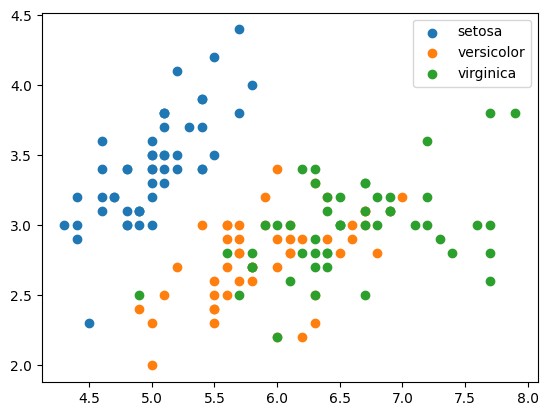

In [82]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], label='setosa')
plt.scatter(versi.iloc[:, 0], versi.iloc[:, 1], label='versicolor')
plt.scatter(virgi.iloc[:, 0], virgi.iloc[:, 1], label='virginica')

plt.legend()
plt.show()

In [83]:
setosa.shape

(50, 5)

In [84]:
versi.shape

(50, 5)

In [85]:
virgi.shape

(50, 5)

In [86]:
x = df.iloc[:, 0:4]

In [87]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
y = df.iloc[:, 4]

In [89]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [90]:
lda = LDA(n_components = 2)
lda_fit = lda.fit(x, y)
lda_trans = lda.transform(x)
lda_pred = lda.predict(x)

In [91]:
cm = confusion_matrix(y, lda_pred)  
print("Confusion Matrix: \n",  cm)  
print()
print('Accuracy: ' + str(accuracy_score(y, lda_pred))) 

Confusion Matrix: 
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]

Accuracy: 0.98


In [137]:
np.random.seed(42)

x1 = []
x2 = []
for group in range(1, 3):
    x1.extend(np.random.randint((group - 1) * 250 + 1, group * 250, size=25))
    x2.extend(np.random.randint((group - 1) * 250 + 1, group * 250, size=25))

group_col = np.repeat([1, 2], 25)

data = pd.DataFrame({'X1': x1, 'X2': x2, 'Group': group_col})

print(data.head(), '\n\n', data.tail()) 

    X1   X2  Group
0  103  158      1
1  180   38      1
2   93  130      1
3   15  192      1
4  107  188      1 

      X1   X2  Group
45  303  396      2
46  380  468      2
47  334  294      2
48  342  412      2
49  361  452      2


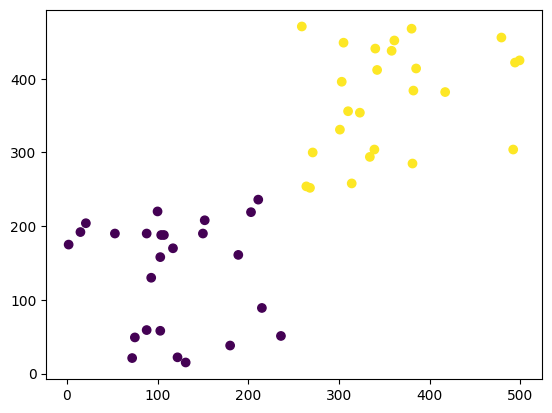

In [93]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = data.iloc[:, 2])
plt.show()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      50 non-null     int32
 1   X2      50 non-null     int32
 2   Group   50 non-null     int32
dtypes: int32(3)
memory usage: 732.0 bytes


In [95]:
data['Group'].unique()

array([1, 2])

In [96]:
g1 = data[data['Group'] == 1]
g2 = data[data['Group'] == 2]

In [138]:
g1

,X1,X2,Group,nx1,nx2
0,103,158,1,-14.2,21.16
1,180,38,1,62.8,-98.84
2,93,130,1,-24.2,-6.84
3,15,192,1,-102.2,55.16
4,107,188,1,-10.2,51.16
5,72,21,1,-45.2,-115.84
6,189,161,1,71.8,24.16
7,21,204,1,-96.2,67.16
8,103,58,1,-14.2,-78.84
9,122,22,1,4.8,-114.84


In [97]:
# Calculating the Between variability

In [98]:
mu11 = np.mean(g1['X1'])
mu12 = np.mean(g1['X2'])
mu21 = np.mean(g2['X1'])
mu22 = np.mean(g2['X2'])

In [99]:
## Difference between the means for the two groups

In [141]:
mu = [mu11 - mu21, mu12 - mu22]

In [101]:
print(mu)

[-238.84000000000003, -235.23999999999998]


In [102]:
## Reshaping it into an array

In [103]:
mu = np.array(mu).reshape(1,2)

In [104]:
print(mu)

[[-238.84 -235.24]]


In [105]:
## Between class variability

In [106]:
sb = np.dot(mu.T, mu)
print(sb)

[[57044.5456 56184.7216]
 [56184.7216 55337.8576]]


In [107]:
## Creating new columns in the G1 and G2

In [108]:
g1['nx1'] = g1['X1'] - mu11
g1['nx2'] = g1['X2'] - mu12

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_10076\2308314167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1['nx1'] = g1['X1'] - mu11
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_10076\2308314167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1['nx2'] = g1['X2'] - mu12


In [109]:
print(g1)

     X1   X2  Group    nx1     nx2
0   103  158      1  -14.2   21.16
1   180   38      1   62.8  -98.84
2    93  130      1  -24.2   -6.84
3    15  192      1 -102.2   55.16
4   107  188      1  -10.2   51.16
5    72   21      1  -45.2 -115.84
6   189  161      1   71.8   24.16
7    21  204      1  -96.2   67.16
8   103   58      1  -14.2  -78.84
9   122   22      1    4.8 -114.84
10  211  236      1   93.8   99.16
11  215   89      1   97.8  -47.84
12   75   49      1  -42.2  -87.84
13  203  219      1   85.8   82.16
14   88   59      1  -29.2  -77.84
15  117  170      1   -0.2   33.16
16  100  220      1  -17.2   83.16
17  104  188      1  -13.2   51.16
18  152  208      1   34.8   71.16
19  131   15      1   13.8 -121.84
20  150  190      1   32.8   53.16
21   53  190      1  -64.2   53.16
22    2  175      1 -115.2   38.16
23   88  190      1  -29.2   53.16
24  236   51      1  118.8  -85.84


In [110]:
g2['nx1'] = g2['X1'] - mu21
g2['nx2'] = g2['X2'] - mu22

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_10076\218547739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['nx1'] = g2['X1'] - mu21
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_10076\218547739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['nx2'] = g2['X2'] - mu22


In [111]:
print(g2)

     X1   X2  Group     nx1     nx2
25  358  438      2    1.96   65.92
26  305  449      2  -51.04   76.92
27  494  422      2  137.96   49.92
28  314  258      2  -42.04 -114.08
29  499  425      2  142.96   52.92
30  381  285      2   24.96  -87.08
31  479  456      2  122.96   83.92
32  301  331      2  -55.04  -41.08
33  385  414      2   28.96   41.92
34  271  300      2  -85.04  -72.08
35  323  354      2  -33.04  -18.08
36  417  382      2   60.96    9.92
37  268  252      2  -88.04 -120.08
38  382  384      2   25.96   11.92
39  339  304      2  -17.04  -68.08
40  310  356      2  -46.04  -16.08
41  264  254      2  -92.04 -118.08
42  492  304      2  135.96  -68.08
43  259  471      2  -97.04   98.92
44  340  441      2  -16.04   68.92
45  303  396      2  -53.04   23.92
46  380  468      2   23.96   95.92
47  334  294      2  -22.04  -78.08
48  342  412      2  -14.04   39.92
49  361  452      2    4.96   79.92


In [112]:
ng1 = g1.iloc[:, 3:5]
ng2 = g2.iloc[:, 3:5]

In [113]:
ng1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nx1     25 non-null     float64
 1   nx2     25 non-null     float64
dtypes: float64(2)
memory usage: 600.0 bytes


In [114]:
## Calculating Within Class variability

In [115]:
sw1 = np.dot(ng1.T, ng1)/25
print(sw1/25)

[[152.9952   -20.64672 ]
 [-20.64672  214.930176]]


In [116]:
sw2 = np.dot(ng2.T, ng2)/25
print(sw2/25)

[[203.291136  65.086272]
 [ 65.086272 205.884544]]


In [117]:
sw = sw1 + sw2
print(sw)

[[ 8907.1584  1110.9888]
 [ 1110.9888 10520.368 ]]


In [118]:
A = np.dot(np.linalg.pinv(sw), sb)
print(A)

[[5.81481249 5.72716668]
 [4.72650102 4.65525917]]


In [144]:
eigvalues, eigvector = np.linalg.eig(A)

In [145]:
## Picking the highest Eigen Vector

In [149]:
high = eigvalues.argsort()[::-1]

In [152]:
eigvalues = eigvalues[high]
print(eigvalues)
eigvector = eigvector[:, high]
eig = eigvector[:, :1]

[10.47007166  0.        ]


In [123]:
## Calculating the scalar projection

In [124]:
k = ng1.iloc[:, 0:2]
l = ng2.iloc[:, 0:2]

mult1 = np.dot(k, eig)
mult2 = np.dot(l, eig)

In [125]:
proj_1 = mult1*eig.T
proj_2 = mult2*eig.T

In [126]:
p1 = pd.DataFrame(proj_1)
p2 = pd.DataFrame(proj_2)

df_new = pd.concat([p1, p2])

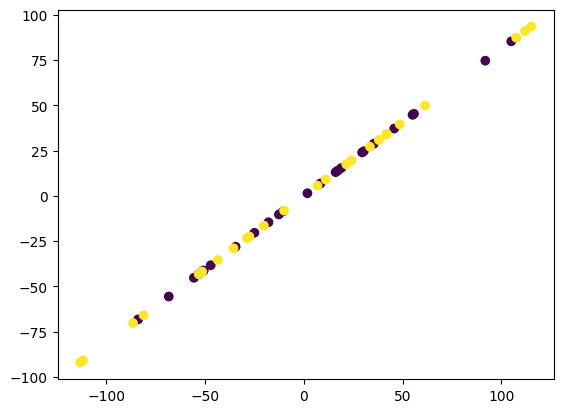

In [127]:
plt.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1], c = data.iloc[:, 2])
plt.show()

In [128]:
x = data.iloc[:, 0:2]
x.head()

,X1,X2
0,103,158
1,180,38
2,93,130
3,15,192
4,107,188


In [129]:
y = data.iloc[:, 2]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Group, dtype: int32

In [130]:
lda = LDA(n_components = 1)

In [131]:
lda_fit = lda.fit(x, y)
lda_trans = lda.transform(x)
lda_predict = lda.predict(x)

In [132]:
cm = confusion_matrix(y, lda_predict)  
print(cm)  
print('Accuracy' + str(accuracy_score(y, lda_predict))) 

[[25  0]
 [ 0 25]]
Accuracy1.0
